<table align="center" width=100%>
    <tr>
        <td width="30%">
            <img src="37b.png">
        </td>
        <td>
            <div align="center">
                <font color="blue" size=8px>
                    <b>Case Study of
                        'FastTrack' Courier company <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

- For a seamless eCommerce shopping experience, it is essential to deliver the product promptly to the customer. And that’s where a professional courier service plays a vital role.'FastTrack' courier company stores the relevant data of its clients and parcels in the form of dictionary. 
- Shipment id is used as a key and list of other attributes like sender, receiver, start date, DeliveryDate, Sender_location, Receiver_location, Delivery status, Shipping cost is associated with shipment id

## `Objective : Analysis of Shipment and finding all possible routes`

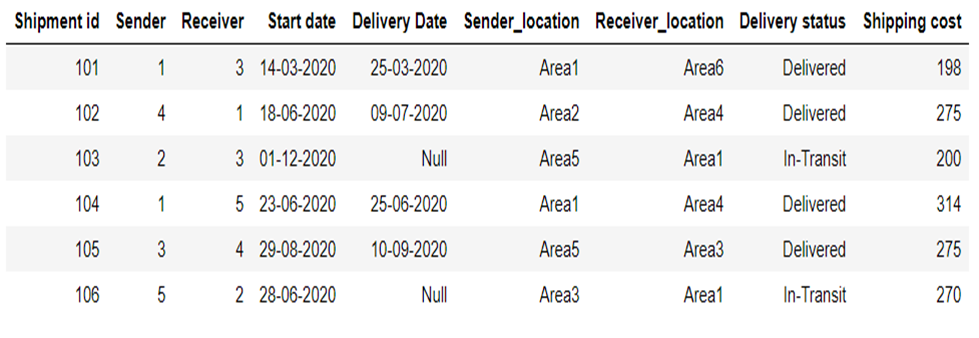












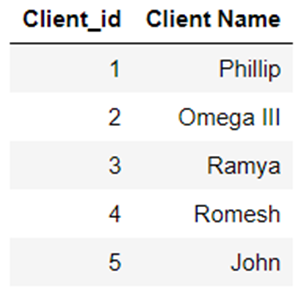








## `shipment information`

In [176]:
info = [[1,4,2,1,3,5],[3,1,3,5,4,2],['14-03-2020','18-06-2020','01-12-2020','23-06-2020','29-08-2020','28-06-2020'],
     ['25-03-2020','09-07-2020','nan','25-06-2020','10-09-2020','nan'],['Area1','Area2','Area5','Area1','Area5','Area3'],
     ['Area6','Area4','Area1','Area4','Area3','Area1'],['Delivered','Delivered','In-Transit','Delivered','Delivered','In-Transit'],
     [198,275,200,314,275,270]]

In [177]:
ship = dict()
h = [101, 102, 103, 104, 105, 106]
for i in h:
    ship.setdefault(i,list())

In [178]:
ship

{101: [], 102: [], 103: [], 104: [], 105: [], 106: []}

In [179]:
for counter1,shipment_id in enumerate(ship):
    for index,container in enumerate(info):
        ship[shipment_id].append(container[counter1])

In [181]:
for i in ship:print(f"{i} : {ship[i]}")

101 : [1, 3, '14-03-2020', '25-03-2020', 'Area1', 'Area6', 'Delivered', 198]
102 : [4, 1, '18-06-2020', '09-07-2020', 'Area2', 'Area4', 'Delivered', 275]
103 : [2, 3, '01-12-2020', 'nan', 'Area5', 'Area1', 'In-Transit', 200]
104 : [1, 5, '23-06-2020', '25-06-2020', 'Area1', 'Area4', 'Delivered', 314]
105 : [3, 4, '29-08-2020', '10-09-2020', 'Area5', 'Area3', 'Delivered', 275]
106 : [5, 2, '28-06-2020', 'nan', 'Area3', 'Area1', 'In-Transit', 270]


## `Client information`

In [182]:
a = [1,2,3,4,5]
b = ['Phillip','Omegalll','Ramya','Romesh','John']

client = dict(zip(a,b))
client

{1: 'Phillip', 2: 'Omegalll', 3: 'Ramya', 4: 'Romesh', 5: 'John'}

## `Replacing client’s id with their respective name from client information` 

In [183]:
df = ship
df

{101: [1, 3, '14-03-2020', '25-03-2020', 'Area1', 'Area6', 'Delivered', 198],
 102: [4, 1, '18-06-2020', '09-07-2020', 'Area2', 'Area4', 'Delivered', 275],
 103: [2, 3, '01-12-2020', 'nan', 'Area5', 'Area1', 'In-Transit', 200],
 104: [1, 5, '23-06-2020', '25-06-2020', 'Area1', 'Area4', 'Delivered', 314],
 105: [3, 4, '29-08-2020', '10-09-2020', 'Area5', 'Area3', 'Delivered', 275],
 106: [5, 2, '28-06-2020', 'nan', 'Area3', 'Area1', 'In-Transit', 270]}

In [184]:
# Replacing id's with names

for key in ship:
    code,value = ship[key][0],ship[key][1]
    ship[key][0],ship[key][1] = client[code],client[value]

In [185]:
for i in ship:print(f"{i} : {ship[i]}")

101 : ['Phillip', 'Ramya', '14-03-2020', '25-03-2020', 'Area1', 'Area6', 'Delivered', 198]
102 : ['Romesh', 'Phillip', '18-06-2020', '09-07-2020', 'Area2', 'Area4', 'Delivered', 275]
103 : ['Omegalll', 'Ramya', '01-12-2020', 'nan', 'Area5', 'Area1', 'In-Transit', 200]
104 : ['Phillip', 'John', '23-06-2020', '25-06-2020', 'Area1', 'Area4', 'Delivered', 314]
105 : ['Ramya', 'Romesh', '29-08-2020', '10-09-2020', 'Area5', 'Area3', 'Delivered', 275]
106 : ['John', 'Omegalll', '28-06-2020', 'nan', 'Area3', 'Area1', 'In-Transit', 270]


### Modifying date format 

In [186]:
t1 = [ship[start_date][2].split("-") for start_date in ship]
t2 = [ship[delivery][3].split("-") if ship[delivery][3]!='nan' else 'nan' for delivery in ship]

In [187]:
t1

[['14', '03', '2020'],
 ['18', '06', '2020'],
 ['01', '12', '2020'],
 ['23', '06', '2020'],
 ['29', '08', '2020'],
 ['28', '06', '2020']]

In [188]:
t2

[['25', '03', '2020'],
 ['09', '07', '2020'],
 'nan',
 ['25', '06', '2020'],
 ['10', '09', '2020'],
 'nan']

In [189]:
split = lambda x:[x[1],x[0],x[2]]
t1_new = ['-'.join(split(start_date)) if start_date != 'nan' else 'NaT' for start_date in t1]
t1_new

['03-14-2020',
 '06-18-2020',
 '12-01-2020',
 '06-23-2020',
 '08-29-2020',
 '06-28-2020']

In [190]:
t2_new = ['-'.join(split(delivery)) if delivery != 'nan' else 'NaT' for delivery in t2]
t2_new

['03-25-2020', '07-09-2020', 'NaT', '06-25-2020', '09-10-2020', 'NaT']

In [191]:
from dateutil import parser as p
difference = lambda x,y : (p.parse(y) - p.parse(x)).days
timediff = [difference(start_date,delivery) if delivery != 'NaT' else 'NaT' for start_date,delivery in zip(t1_new,t2_new)]
timediff

[11, 21, 'NaT', 2, 12, 'NaT']

### `inserting a timediff as information in shipment dictionary after delivery date`

In [192]:
for counter,key in enumerate(ship):
    ship[key].insert(4,timediff[counter])
    
for i in ship:print(f"{i} : {ship[i]}")

101 : ['Phillip', 'Ramya', '14-03-2020', '25-03-2020', 11, 'Area1', 'Area6', 'Delivered', 198]
102 : ['Romesh', 'Phillip', '18-06-2020', '09-07-2020', 21, 'Area2', 'Area4', 'Delivered', 275]
103 : ['Omegalll', 'Ramya', '01-12-2020', 'nan', 'NaT', 'Area5', 'Area1', 'In-Transit', 200]
104 : ['Phillip', 'John', '23-06-2020', '25-06-2020', 2, 'Area1', 'Area4', 'Delivered', 314]
105 : ['Ramya', 'Romesh', '29-08-2020', '10-09-2020', 12, 'Area5', 'Area3', 'Delivered', 275]
106 : ['John', 'Omegalll', '28-06-2020', 'nan', 'NaT', 'Area3', 'Area1', 'In-Transit', 270]


### `All shipment details that are sent by Phillip` 

In [193]:
philip = {key:iterable for key,iterable in ship.items() if iterable[0] == 'Phillip'}

print(f"All Shipments that are sent by Philip - ")
print("-"*100)

for key in philip:print(f"{key} : {ship[key]}") 

All Shipments that are sent by Philip - 
----------------------------------------------------------------------------------------------------
101 : ['Phillip', 'Ramya', '14-03-2020', '25-03-2020', 11, 'Area1', 'Area6', 'Delivered', 198]
104 : ['Phillip', 'John', '23-06-2020', '25-06-2020', 2, 'Area1', 'Area4', 'Delivered', 314]


### `All shipment details that are received by Ramya ` 

In [194]:
Ramya = {key:iterable for key,iterable in ship.items() if iterable[1] == 'Ramya'}

print("All Shipments that are received by Ramya - ")
print("-"*100)

for key in Ramya:print(f"{key} : {Ramya[key]}")

All Shipments that are received by Ramya - 
----------------------------------------------------------------------------------------------------
101 : ['Phillip', 'Ramya', '14-03-2020', '25-03-2020', 11, 'Area1', 'Area6', 'Delivered', 198]
103 : ['Omegalll', 'Ramya', '01-12-2020', 'nan', 'NaT', 'Area5', 'Area1', 'In-Transit', 200]


### `shipments which are in 'In-Transit' status ` 

In [198]:
In_transit = {key:iterable for key,iterable in ship.items() if iterable[7] == 'In-Transit'}

print("Shipments are in 'In-Transit' status - ")
print("-"*100)

for key in In_transit:print(f"{key} : {In_transit[key]}")

Shipments are in 'In-Transit' status - 
----------------------------------------------------------------------------------------------------
103 : ['Omegalll', 'Ramya', '01-12-2020', 'nan', 'NaT', 'Area5', 'Area1', 'In-Transit', 200]
106 : ['John', 'Omegalll', '28-06-2020', 'nan', 'NaT', 'Area3', 'Area1', 'In-Transit', 270]


### `Shipments delivered within 7 days`

adding a new element in the dictionary with the key 'timediff' and values as difference between Delivery Date and Start_date

In [222]:
shipment_in_7days = {key:iterable for key,iterable in ship.items() if type(iterable[4]) == int and iterable[4] < 7}
print("-"*100)
for key in shipment_in_7days:print(f"{key} : {shipment_in_7days[key]}")

----------------------------------------------------------------------------------------------------
104 : ['Phillip', 'John', '23-06-2020', '25-06-2020', 2, 'Area1', 'Area4', 'Delivered', 314]


### `shipments which are delivered after 15 days of courier start date or not yet been delivered.`
  

In [227]:
Any_late_shipment = {key:iterable for key,iterable in ship.items() 
                     if type(iterable[4]) == int if iterable[4] > 15 if iterable[7] == 'In-Transit'}

if len(Any_late_shipment) == 0:
    print("No such record where shipments which are delivered after 15 days of courier start date or not yet been delivered")
else:
    print(Any_late_shipment)

No such record where shipments which are delivered after 15 days of courier start date or not yet been delivered


## `Route Graph`

### all_routes to display all possible routes from senders location to receivers location given in the dictionary for each shipment

### *`1 represents the route between nodes and`*

### *`0 represents there is no direct route exist between the nodes`*





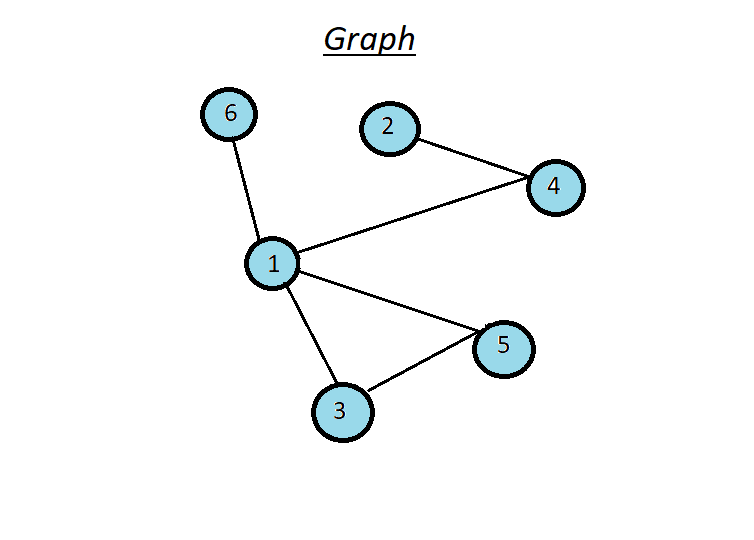











In [230]:
# Retrieving area wise details

start = [iterable[5] for key,iterable in ship.items()]
end =   [iterable[6] for key,iterable in ship.items()]

Area_map = list(zip(start,end))
Area_map

[('Area1', 'Area6'),
 ('Area2', 'Area4'),
 ('Area5', 'Area1'),
 ('Area1', 'Area4'),
 ('Area5', 'Area3'),
 ('Area3', 'Area1')]

In [262]:
pathway_pair = [(Area1[4],Area2[4]) for Area1,Area2 in Area_map]
pathway_pair

[('1', '6'), ('2', '4'), ('5', '1'), ('1', '4'), ('5', '3'), ('3', '1')]

### `Adjecency List`

In [238]:
# Importing Regular Expression module

import re

In [263]:
def Route(Map):
    """
    Area_map should be list of (from,to) tuples
    """
    way = [(re.findall('(\d)',Area1)[0],re.findall('(\d)',Area2)[0]) for Area1,Area2 in Map]
    visited_matrix = dict()
    for Area1,Area2 in pathway_pair:
        if Area1 in visited_matrix:
            visited_matrix[Area1].append(Area2)
        else:
            visited_matrix[Area1] = [Area2]      
    return visited_matrix

In [264]:
Route(Area_map)

{'1': ['6', '4'], '2': ['4'], '5': ['1', '3'], '3': ['1']}

### `Adjecency Matrix`

In [268]:
Adjecency_matrix = [[0 for i in range(6)] for j in range(6)]
Adjecency_matrix

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

presence of 1 represents the route between nodes and 0 represents there is no direct route exist between the nodes

In [269]:
for x,y in pathway_pair:
    Adjecency_matrix[int(x)-1][int(y)-1] = 1
    Adjecency_matrix[int(y)-1][int(x)-1] = 1
Adjecency_matrix

[[0, 0, 1, 1, 1, 1],
 [0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 1, 0],
 [1, 1, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0]]

In [255]:
visited = [False for i in range(len(zero))]
path = []
ids = [i for i in ship]

### `Function to find all possible routes considering the graph as undirected`

In [260]:
def find_pathway(matrix,sender,receiver,visited,path): 
    # Marking the starting node as visited
    visited[sender] = True 
    # Appending the 1st node in path as starting node
    path.append(sender+1)
    # if sender equal to receiver print path
    if sender == receiver: 
        print(path)
    else:
        for column in range(len(matrix)):  #column wise traversing
            if matrix[sender][column] == 1 and (visited[column] == False):
                # If that node is not visited, going to that node, initializing sender as present node
                # Invoking a function to find next path from that node which is not visited
                # Invoking a function recursively for paths to reach the receiver
                find_pathway(matrix,column,receiver,visited,path) 
    # Marking this last node as unvisited and removing a path, 
    # Backward Traversing
    # so that it can be further visited for any alternate path through it.
    path.pop()
    visited[sender] = False

In [287]:
def all_possible_roots(ids,pathway,Adjecency_matrix):
    print('Shipment_ID :',ids)
    print("---------------------------------------------------")
    id_count = 0
    for i,j in pathway:
        print(f"Shipment ID : {ids[id_count]:10}")
        sender = int(i)
        print(f"Senders's location : {sender:2}")
        receiver= int(j)
        print(f"Receiver's location : {receiver:1}")
        print("All possible routes are as follows")
        find_pathway(Adjecency_matrix,sender-1,receiver-1,visited,path)
        print("------------------------------------")
        id_count+=1
all_possible_roots(ids,way,Adjecency_matrix)

Shipment_ID : [101, 102, 103, 104, 105, 106]
---------------------------------------------------
Shipment ID :        101
Senders's location :  1
Receiver's location : 6
All possible routes are as follows
[1, 6]
------------------------------------
Shipment ID :        102
Senders's location :  2
Receiver's location : 4
All possible routes are as follows
[2, 4]
------------------------------------
Shipment ID :        103
Senders's location :  5
Receiver's location : 1
All possible routes are as follows
[5, 1]
[5, 3, 1]
------------------------------------
Shipment ID :        104
Senders's location :  1
Receiver's location : 4
All possible routes are as follows
[1, 4]
------------------------------------
Shipment ID :        105
Senders's location :  5
Receiver's location : 3
All possible routes are as follows
[5, 1, 3]
[5, 3]
------------------------------------
Shipment ID :        106
Senders's location :  3
Receiver's location : 1
All possible routes are as follows
[3, 1]
[3, 5, 1